In [481]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [482]:
df=pd.read_csv(r"C:\Users\amuke\Downloads\archive (4)\Bengaluru_House_Data.csv")

In [483]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Super built-up  Area'),
  Text(1, 0, 'Built-up  Area'),
  Text(2, 0, 'Plot  Area'),
  Text(3, 0, 'Carpet  Area')])

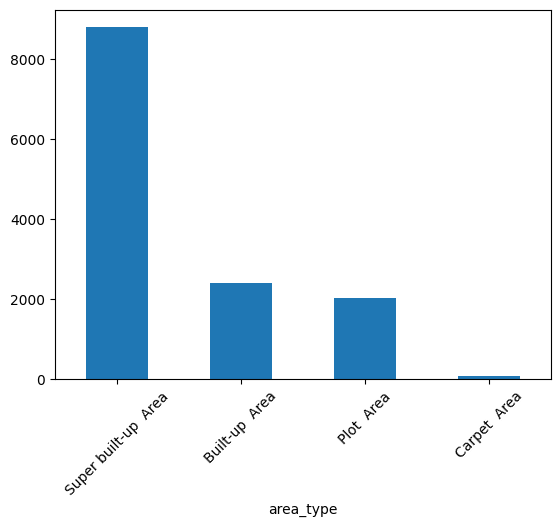

In [484]:
df['area_type'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)

In [485]:
df['availability'].nunique()

81

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [487]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [488]:
size_split = df['size'].str.split(' ', expand=True)

In [489]:
size_split[1]=df['size'].str.split(' ',expand=True)[1].replace('Bedroom','BHK')
df['size']=size_split[0]+' '+size_split[1]

In [490]:
df.drop('society',axis=1,inplace=True)

In [491]:
df.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [492]:
df['balcony'].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [493]:
df['location'].fillna('Whitefield',inplace=True)

In [494]:
df['size'].fillna('2 BHK',inplace=True)

In [495]:
df['bath'].fillna(int(df['bath'].mean()),inplace=True)

In [496]:
df['balcony'].fillna(2.0,inplace=True)

In [497]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [498]:
def convert_sqft_to_num(x):
    try:
       
        if '-' in x:
            sqft_range = x.split('-')
            return (float(sqft_range[0]) + float(sqft_range[1])) / 2
      
        return float(x)
    except:
        return None  

In [499]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df = df.dropna(subset=['total_sqft'])

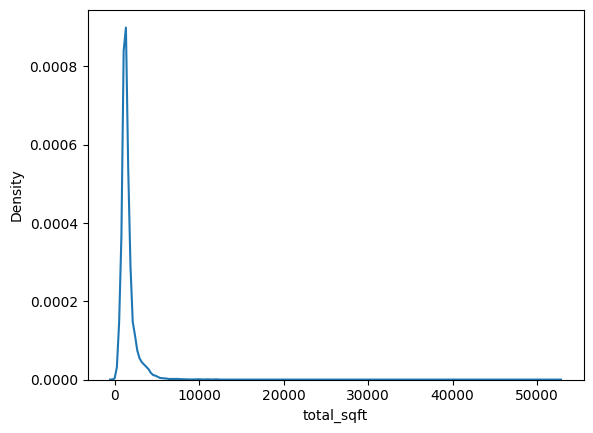

In [500]:
sns.kdeplot(df['total_sqft'])
plt.show()

In [501]:
Q1=df['price'].quantile(.25)
Q3=df['price'].quantile(.75)

In [502]:
IQR=Q3-Q1
min=Q1-1.5*IQR
max=Q3+1.5*IQR

In [503]:
df=df[(df['price']<max) & (df['price']>min)]

In [504]:
Q1=df['total_sqft'].quantile(.25)
Q3=df['total_sqft'].quantile(.75)

In [505]:
IQR=Q3-Q1
min=Q1-1.5*IQR
max=Q3+1.5*IQR

In [506]:
df=df[(df['total_sqft']<max) & (df['total_sqft']>min)]

In [507]:
df.describe()

,total_sqft,bath,balcony,price
count,11272.000000,11272.000000,11272.000000,11272.000000
mean,1269.461095,2.403833,1.564496,74.303581
std,349.136051,0.984655,0.779991,38.393674
min,381.000000,1.000000,0.000000,8.440000
25%,1070.000000,2.000000,1.000000,47.000000
50%,1215.000000,2.000000,2.000000,65.000000
75%,1490.000000,3.000000,2.000000,91.000000
max,2254.000000,18.000000,3.000000,224.000000


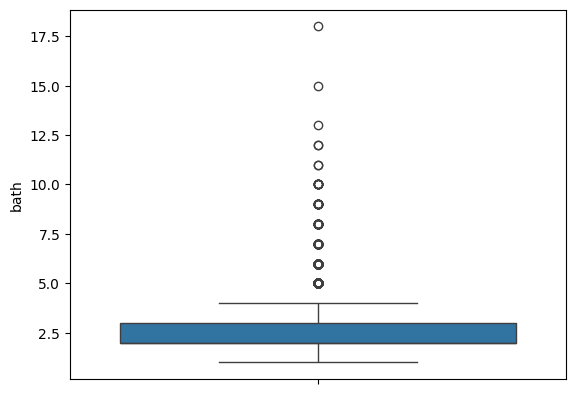

In [508]:
sns.boxplot(df['bath'])
plt.show()

In [509]:
df['location'].nunique()

1149

In [510]:
# Step 1: Identify locations that occur less than 10 times
location_counts = df['location'].value_counts()
locations_to_replace = location_counts[location_counts <= 10].index

# Step 2: Replace these locations with 'Other'
df['location'] = df['location'].replace(locations_to_replace, 'Other')


In [511]:
df['BHK']=df['size'].str.split(' ', expand=True)[0]

In [512]:
df.drop(columns=['size','availability','balcony'],inplace=True)

In [513]:
df.head()

,area_type,location,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2
5,Super built-up Area,Whitefield,1170.0,2.0,38.00,2


In [514]:
df['BHK']=df['BHK'].astype(float)

In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11272 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   11272 non-null  object 
 1   location    11272 non-null  object 
 2   total_sqft  11272 non-null  float64
 3   bath        11272 non-null  float64
 4   price       11272 non-null  float64
 5   BHK         11272 non-null  float64
dtypes: float64(4), object(2)
memory usage: 616.4+ KB


In [516]:
Q1=df['BHK'].quantile(.25)
Q3=df['BHK'].quantile(.75)

In [517]:
IQR=Q3-Q1
min=Q1-1.5*IQR
max=Q3+1.5*IQR

In [518]:
df=df[(df['BHK']<max) & (df['BHK']>min)]

In [519]:
df.head()

,area_type,location,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2.0
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2.0
5,Super built-up Area,Whitefield,1170.0,2.0,38.00,2.0


In [520]:
df.describe()

,total_sqft,bath,price,BHK
count,10870.000000,10870.000000,10870.000000,10870.000000
mean,1273.648709,2.281877,72.270558,2.424011
std,348.018733,0.669261,36.663944,0.665843
min,381.000000,1.000000,8.440000,1.000000
25%,1075.000000,2.000000,46.000000,2.000000
50%,1220.000000,2.000000,63.000000,2.000000
75%,1495.000000,3.000000,89.500000,3.000000
max,2254.000000,6.000000,224.000000,4.000000


In [521]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('price',axis=1),df['price'],test_size=.2,random_state=0)

In [522]:
x_train

,area_type,location,total_sqft,bath,BHK
3507,Super built-up Area,Kodichikkanahalli,1125.0,2.0,2.0
4851,Plot Area,Ramamurthy Nagar,1200.0,2.0,2.0
6913,Super built-up Area,Kanakapura,1130.0,2.0,2.0
2505,Super built-up Area,Other,1200.0,3.0,2.0
9987,Super built-up Area,Sarjapur Road,1314.0,2.0,2.0
...,...,...,...,...,...
5948,Super built-up Area,Panathur,1370.0,2.0,3.0
3990,Super built-up Area,Somasundara Palya,1329.0,2.0,2.0
12074,Super built-up Area,Thanisandra,1930.0,4.0,3.0
13231,Super built-up Area,Thigalarapalya,2215.0,4.0,3.0


In [523]:
trf=ColumnTransformer([('OHE',OneHotEncoder(sparse_output=False),['location','area_type'])],
                      remainder='passthrough')

In [524]:
scale=StandardScaler()

In [529]:
lr=LinearRegression()

In [530]:
pipe=make_pipeline(trf,scale,lr)

In [531]:
pipe.fit(x_train,y_train)

c:\Users\amuke\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location', 'area_type'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [532]:


y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.5795486163479359

In [533]:
from sklearn.model_selection import cross_val_score